In [22]:
# TITANIC SURVIVAL PREDICTION

In [23]:
# Importing Data

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [25]:
data=pd.read_csv(r'C:\Users\Shraddha\OneDrive\Desktop\CODSOFT\tested.csv',index_col=0,header=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [26]:
data = data[['Pclass','Sex','Age','Survived']]
data

,Pclass,Sex,Age,Survived
PassengerId,,,,
892,3,male,34.5,0
893,3,female,47.0,1
894,2,male,62.0,0
895,3,male,27.0,0
896,3,female,22.0,1
...,...,...,...,...
1305,3,male,NaN,0
1306,1,female,39.0,1
1307,3,male,38.5,0


In [27]:
# Finding the null values

In [28]:
data.isnull().sum()

Pclass       0
Sex          0
Age         86
Survived     0
dtype: int64

In [29]:
# Replacing the null values

In [30]:
data['Age'].fillna(int(data['Age'].mean()),inplace=True)
data.isnull().sum()

Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64

In [31]:
# Label encoding - converting categorical data into numerical data

In [32]:
from sklearn import preprocessing
colname=['Sex']
le=preprocessing.LabelEncoder()
for x in colname:
    data[x]=le.fit_transform(data[x])

In [33]:
#checking for imbalance data
count=pd.value_counts(data['Survived'],sort=True)
count

0    266
1    152
Name: Survived, dtype: int64

<Axes: >

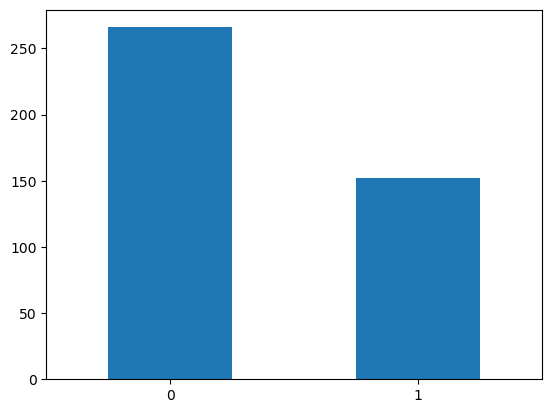

In [34]:
count.plot(kind='bar',rot=0)

In [35]:
data.describe()

,Pclass,Sex,Age,Survived
count,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,30.216507,0.363636
std,0.841838,0.481622,12.635016,0.481622
min,1.000000,0.000000,0.170000,0.000000
25%,1.000000,0.000000,23.000000,0.000000
50%,3.000000,1.000000,30.000000,0.000000
75%,3.000000,1.000000,35.750000,1.000000
max,3.000000,1.000000,76.000000,1.000000


In [36]:
data.head()

,Pclass,Sex,Age,Survived
PassengerId,,,,
892,3,1,34.5,0
893,3,0,47.0,1
894,2,1,62.0,0
895,3,1,27.0,0
896,3,0,22.0,1


In [37]:
# Splitting the data

In [38]:
X=data.drop(["Survived"],axis=1).values
y=data["Survived"].values

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(334, 3)
(84, 3)
(334,)
(84,)


In [40]:
def model_val(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(model)

    print(f"Test Data Accuracy: {accuracy_score(y_test,y_pred)}")
    print("Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print("Classification_report: \n",classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)

In [41]:
# K-Nearest Neighbours Model

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
knn=KNeighborsClassifier()
model_val(knn,X_train,X_test,y_train,y_test)

KNeighborsClassifier()
Test Data Accuracy: 0.8333333333333334
Model Test F1 Score is:  0.7586206896551724
Classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87        53
           1       0.81      0.71      0.76        31

    accuracy                           0.83        84
   macro avg       0.83      0.81      0.82        84
weighted avg       0.83      0.83      0.83        84

Confusion Matrix:
[[48  5]
 [ 9 22]]


In [43]:
# Logistic Regression Model

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_val(lr,X_train,X_test,y_train,y_test)

LogisticRegression()
Test Data Accuracy: 1.0
Model Test F1 Score is:  1.0
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
[[53  0]
 [ 0 31]]
